In [13]:
#dataframes
import pandas as pd
import h5py

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math as m
from scipy.spatial.distance import cdist
from scipy import signal

#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc
import cairosvg
import time
np.set_printoptions(suppress=True)
# matplotlib.rcParams['font.family'] = [ 'sans-serif']
FS=7

In [14]:
import fly_plot_lib.plot as fpl
from plot_utility import colorbar

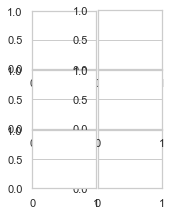

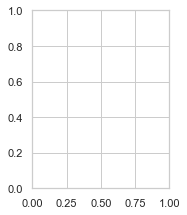

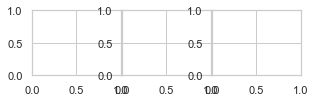

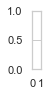

In [15]:
layout = fifi.svg_to_axes.FigureLayout('../../../Figure/Paper/fig3.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

### Panel A

In [16]:
dir = '~/Documents/Myfiles/DataAnalysis/data/Sprints/LowRes/'
df = pd.read_hdf(dir+'NotWindy.h5')
dt= df.master_time[1]-df.master_time[0]
df = df[df['time'].between(100,300)]
df.reset_index(inplace=True, drop=True) 

def streakline_container(eastwest,northsouth):

    for i in range((len(eastwest))-1,-1, -1): 
        eastwest = np.resize(np.array([eastwest-df.corrected_u[i]*dt]),(1,i)).flatten() 
        northsouth = np.resize(np.array([northsouth-df.corrected_v[i]*dt]),(1,i)).flatten()
        x.loc[i]=np.pad(eastwest, ((len(df)-len(eastwest)),0),'constant', constant_values=(0))
        y.loc[i]=np.pad(northsouth, ((len(df)-len(northsouth)),0),'constant', constant_values=(0))

def streakline_calculation(df):
    et = [np.sum(df.corrected_u[j:])*dt for j in range(0,len(df))]
    nt = [np.sum(df.corrected_v[j:])*dt for j in range(0,len(df))]
    return et, nt

def prepare_df(df):
    df.pop(df.columns[0])
    strings=[]
    for i in range(len(df)-1,0,-1):
        strings.append("p"+str(i))
    df.columns=strings
    df.reset_index(inplace=True, drop=True) 
    return df

    
et, nt = streakline_calculation(df)

strings=[]
for i in range(len(df)):
    strings.append("p"+str(i))

x=pd.DataFrame(columns=strings,index=range(len(df)))
y=pd.DataFrame(columns=strings,index=range(len(df)))
streakline_container(et,nt)
x=prepare_df(x)
y=prepare_df(y)

2022-10-18 11:18:26,458 [INFO] Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-10-18 11:18:26,459 [INFO] NumExpr defaulting to 8 threads.


In [44]:
ax=layout.axes[('fig1','sta')]
i=779
area = (np.arange(start = i, stop = 0 , step = -1)) #area
ax.scatter(x.loc[i][x.loc[i]!=0],y.loc[i][y.loc[i]!=0], c='#febf6e', s=np.power(area,0.7), 
           edgecolors='none',rasterized=True)

ax.plot(df.xsrc[i],df.ysrc[i],marker='*', markersize=11, c='green', rasterized=True)

var = ax.scatter(df.xsrc[:i],df.ysrc[:i], c = df.odor[:i],
                     cmap = 'inferno_r', vmin =0 , vmax = 10, s = 12,rasterized=True )       
# c_bar(ax, var)
ax.grid(False)
ax.axes.axis('off')
ax.autoscale(enable=True)
ax.set_xlim(-5,15)
ax.set_ylim(-5,25)

ax.text(-4, 20,"time= " + str('{:.4g}'.format(df.time[i]))+ " s")
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/Paper/fig3.svg')
    

In [45]:
ax=layout.axes[('fig1','stb')]
i=987
area = (np.arange(start = i, stop = 0 , step = -1)) #area
ax.scatter(x.loc[i][x.loc[i]!=0],y.loc[i][y.loc[i]!=0], c='#febf6e', s=np.power(area,0.7), 
           edgecolors='none',rasterized=True)

ax.plot(df.xsrc[i],df.ysrc[i],marker='*', markersize=11, c='green', rasterized=True)

var = ax.scatter(df.xsrc[:i],df.ysrc[:i], c = df.odor[:i],
                     cmap = 'inferno_r', vmin =0 , vmax = 10, s = 12,rasterized=True )       
ax.grid(False)
ax.axes.axis('off')
ax.autoscale(enable=True)
ax.set_xlim(-5,15)
ax.set_ylim(-5,25)

ax.text(-4, 20,"time= " + str('{:.4g}'.format(df.time[i]))+ " s")
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/Paper/fig3.svg')
    

In [46]:
ax=layout.axes[('fig1','stc')]
i=1089
area = (np.arange(start = i, stop = 0 , step = -1)) #area
ax.scatter(x.loc[i][x.loc[i]!=0],y.loc[i][y.loc[i]!=0], c='#febf6e', s=np.power(area,0.7), 
           edgecolors='none',rasterized=True)

ax.plot(df.xsrc[i],df.ysrc[i],marker='*', markersize=11, c='green', rasterized=True)

var = ax.scatter(df.xsrc[:i],df.ysrc[:i], c = df.odor[:i],
                     cmap = 'inferno_r', vmin =0 , vmax = 10, s = 12,rasterized=True )       
ax.grid(False)
ax.axes.axis('off')
ax.autoscale(enable=True)
ax.set_xlim(-5,15)
ax.set_ylim(-5,25)

ax.text(-4, 20,"time= " + str('{:.4g}'.format(df.time[i]))+ " s")
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/Paper/fig3.svg')
    

In [47]:
ax=layout.axes[('fig1','std')]
i=1143
area = (np.arange(start = i, stop = 0 , step = -1)) #area
ax.scatter(x.loc[i][x.loc[i]!=0],y.loc[i][y.loc[i]!=0], c='#febf6e', s=np.power(area,0.7), 
           edgecolors='none',rasterized=True)

ax.plot(df.xsrc[i],df.ysrc[i],marker='*', markersize=11, c='green', rasterized=True)

var = ax.scatter(df.xsrc[:i],df.ysrc[:i], c = df.odor[:i],
                     cmap = 'inferno_r', vmin =0 , vmax = 10, s = 12,rasterized=True )       
ax.grid(False)
ax.axes.axis('off')
ax.autoscale(enable=True)
ax.set_xlim(-10,15)
ax.set_ylim(-5,25)

ax.text(-4, 20,"time= " + str('{:.4g}'.format(df.time[i]))+ " s")
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/Paper/fig3.svg')
    

In [55]:
ax=layout.axes[('fig1','ste')]
i=1179
area = (np.arange(start = i, stop = 0 , step = -1)) #area
ax.scatter(x.loc[i][x.loc[i]!=0],y.loc[i][y.loc[i]!=0], c='#febf6e', s=np.power(area,0.7), 
           edgecolors='none',rasterized=True)

ax.plot(df.xsrc[i],df.ysrc[i],marker='*', markersize=11, c='green', rasterized=True)

var = ax.scatter(df.xsrc[:i],df.ysrc[:i], c = df.odor[:i],
                     cmap = 'inferno_r', vmin =0 , vmax = 10, s = 12,rasterized=True )       
ax.grid(False)

ax.autoscale(enable=True)
ax.set_xlim(-10,15)
ax.set_ylim(-5,25)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=[-10,15],
                            yticks=[-5,10,25],
                            linewidth=1)

ax.text(-4, 20,"time= " + str('{:.4g}'.format(df.time[i]))+ " s")
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/Paper/fig3.svg')
    

In [49]:
ax=layout.axes[('fig1','stf')]
i=1210
area = (np.arange(start = i, stop = 0 , step = -1)) #area
ax.scatter(x.loc[i][x.loc[i]!=0],y.loc[i][y.loc[i]!=0], c='#febf6e', s=np.power(area,0.7), 
           edgecolors='none',rasterized=True)

ax.plot(df.xsrc[i],df.ysrc[i],marker='*', markersize=11, c='green', rasterized=True)

var = ax.scatter(df.xsrc[:i],df.ysrc[:i], c = df.odor[:i],
                     cmap = 'inferno_r', vmin =0 , vmax = 10, s = 12,rasterized=True )       
ax.grid(False)
ax.axes.axis('off')
ax.autoscale(enable=True)
ax.set_xlim(-10,15)
ax.set_ylim(-5,25)

ax.text(-4, 20,"time= " + str('{:.4g}'.format(df.time[i]))+ " s")
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/Paper/fig3.svg')
    

In [50]:
ax = layout.axes[('cbar1', 'cbar1')]

colorbar(ax=ax, colormap='inferno_r', orientation='vertical', ticks=[0,10])
mpl_functions.adjust_spines(ax, ['right'], 
                                     yticks=[0, 10],
                                     tick_length=2.5,
                                     spine_locations={},
                                     linewidth=0.5)

ax.set_ylabel("Odor(v)",rotation=-90, labelpad=-12)

ax.set_yticklabels(['0', '10'])
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['cbar1'], 'cbar1', cleartarget=True)
layout.write_svg('../../../Figure/Paper/fig3.svg')

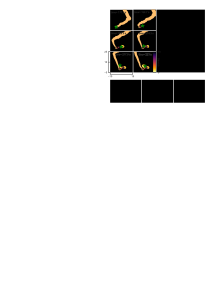

In [51]:
display(SVG('../../../Figure/Paper/fig3.svg'))